# Dataviz ? Passages aux urgences

Ce notebook g?n?re les visualisations demand?es ? partir de `Data_set_final.csv`.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

df = pd.read_csv("../outputs/Data_set_final.csv")
df["date_semaine"] = pd.to_datetime(df["date_semaine"], errors="coerce")


## Dataviz 1 ? ?volution des passages aux urgences dans le temps
**Question m?tier :** Observe?t?on des pics d?activit? aux urgences ? ? quelles p?riodes ?

**? dire ? l?oral :**
Ce graphique met en ?vidence une forte saisonnalit?, notamment pour la grippe et la bronchiolite en p?riode hivernale.


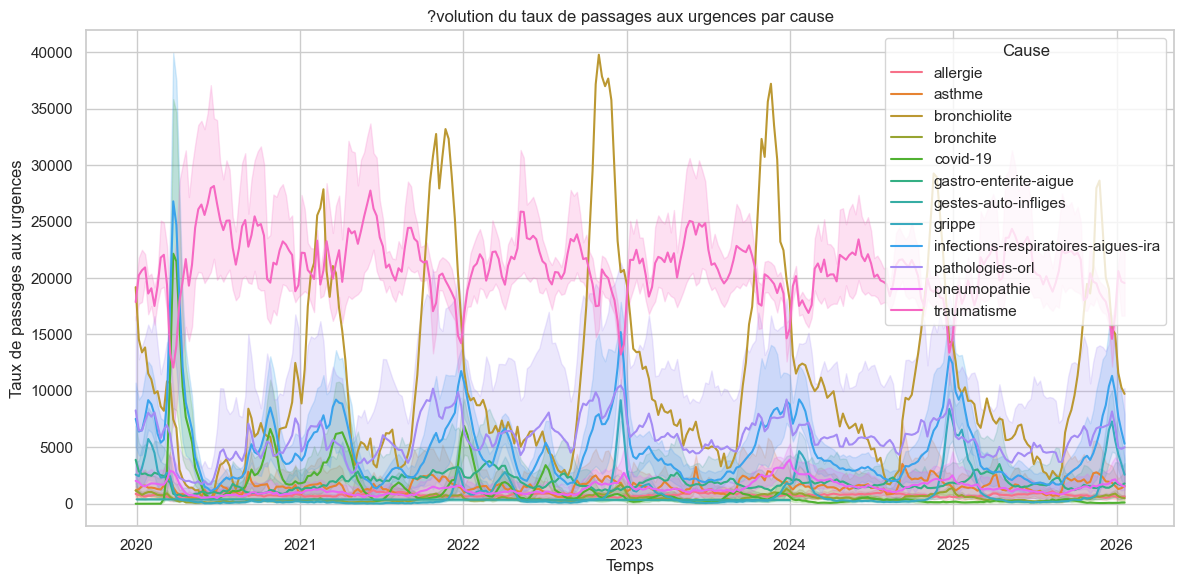

In [2]:
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df,
    x="date_semaine",
    y="taux_passages_urgences",
    hue="raison"
)
plt.title("?volution du taux de passages aux urgences par cause")
plt.xlabel("Temps")
plt.ylabel("Taux de passages aux urgences")
plt.legend(title="Cause")
plt.tight_layout()
plt.show()


## Dataviz 2 ? Comparaison des causes (impact moyen)
**Question m?tier :** Quelles pathologies g?n?rent le plus de pression sur les urgences ?

**? dire :**
Certaines pathologies, bien que moins m?diatis?es, g?n?rent une pression structurelle continue sur les urgences.


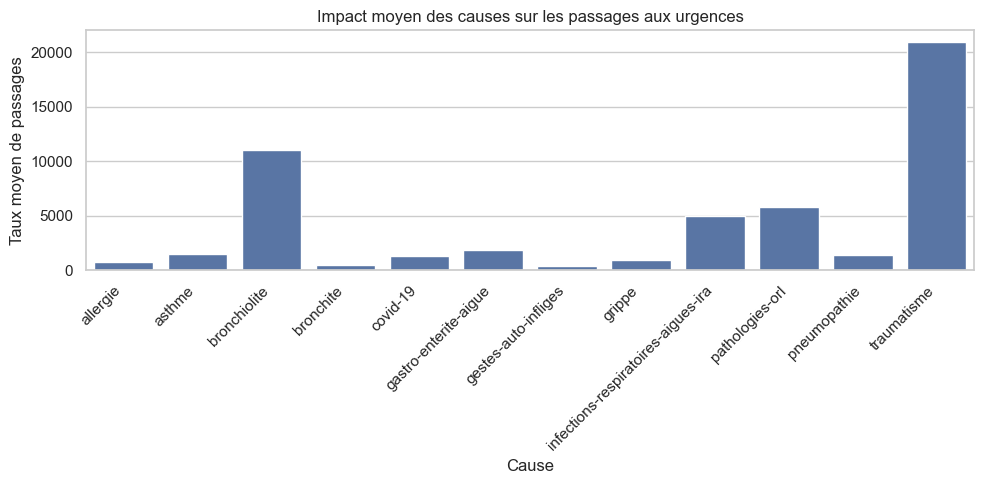

In [3]:
df_mean = df.groupby("raison")["taux_passages_urgences"].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(
    data=df_mean,
    x="raison",
    y="taux_passages_urgences"
)
plt.title("Impact moyen des causes sur les passages aux urgences")
plt.xlabel("Cause")
plt.ylabel("Taux moyen de passages")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


## Dataviz 3 ? Gravit? des situations (hospitalisation)
**Question m?tier :** Quelles causes entra?nent le plus d?hospitalisations apr?s passage aux urgences ?

**? dire :**
Le COVID et les infections respiratoires pr?sentent des taux d?hospitalisation plus ?lev?s, traduisant une gravit? accrue.


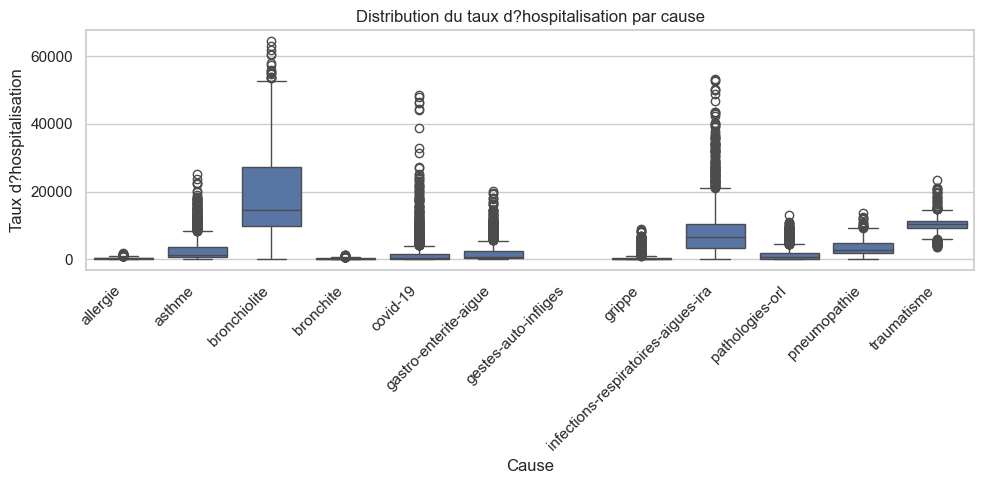

In [4]:
plt.figure(figsize=(10, 5))
sns.boxplot(
    data=df,
    x="raison",
    y="taux_hospitalisation"
)
plt.title("Distribution du taux d?hospitalisation par cause")
plt.xlabel("Cause")
plt.ylabel("Taux d?hospitalisation")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


## Dataviz 4 ? Saisonnalit? (heatmap)
**Question m?tier :** Y a?t?il des p?riodes de l?ann?e plus critiques que d?autres ?

**? dire :**
Cette heatmap confirme une concentration des pics d?activit? en hiver, ce qui justifie une anticipation des ressources ? cette p?riode.


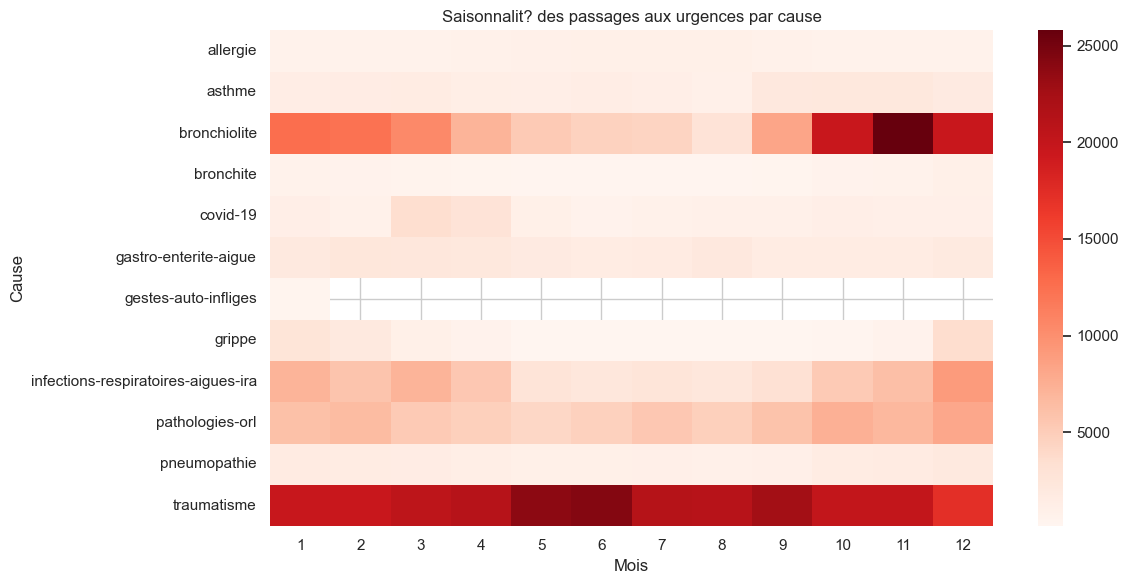

In [5]:
df["mois"] = df["date_semaine"].dt.month

pivot = df.pivot_table(
    values="taux_passages_urgences",
    index="raison",
    columns="mois",
    aggfunc="mean"
)

plt.figure(figsize=(12, 6))
sns.heatmap(pivot, cmap="Reds")
plt.title("Saisonnalit? des passages aux urgences par cause")
plt.xlabel("Mois")
plt.ylabel("Cause")
plt.tight_layout()
plt.show()


## (Optionnel) Dataviz 5 ? Indice de tension
Si vous avez une colonne `indice_tension`, d?commentez le code ci?dessous.


In [6]:
# plt.figure(figsize=(12, 6))
# sns.lineplot(
#     data=df,
#     x="date_semaine",
#     y="indice_tension",
#     hue="raison"
# )
# plt.title("?volution de l?indice de tension hospitali?re")
# plt.tight_layout()
# plt.show()


---
## Conseils pour le rapport
Pour chaque graphique, r?dige :

1. Une phrase sur l?objectif du graphique
2. Deux phrases d?interpr?tation m?tier
3. Une phrase d?impact d?cisionnel
